# Simple Position

In [1]:
%matplotlib notebook
from notebook_quick_setup import *

Beginning notebook setup...
	Added /home/jhewers/Documents/projects/jdrones/src to path
	Imported gymnasium version 0.27.1


pybullet build time: Feb  2 2023 13:13:41
/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


	Imported jdrones version unknown
	Imported scipy==1.7.3, numpy==1.23.5, pandas==1.3.5
	Imported functools, collections and itertools
	Imported tqdm (standard and trange)
	Imported seaborn==0.11.2, matplotlib==3.5.1
End of notebook setup


In [2]:
dt = 1/240
seed = 1337

In [3]:
initial_state = State()
initial_state.pos = (0,0,1)
env = gymnasium.make("PositionDroneEnv-v0", dt=dt, initial_state=initial_state)

/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:129: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [4]:
observations = collections.deque()

obs, info = env.reset(seed=seed)

for i in trange(4):   
    obs, reward, term, trunc, info = env.step(env.action_space.sample())
    
    observations.append(np.copy(obs))
    
    if trunc:
        print(f"{trunc=} {term=} {info=}")
        break

  0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
df = States(np.concatenate(observations)).to_df(tag='Observations',dt=dt)

<IPython.core.display.Javascript object>


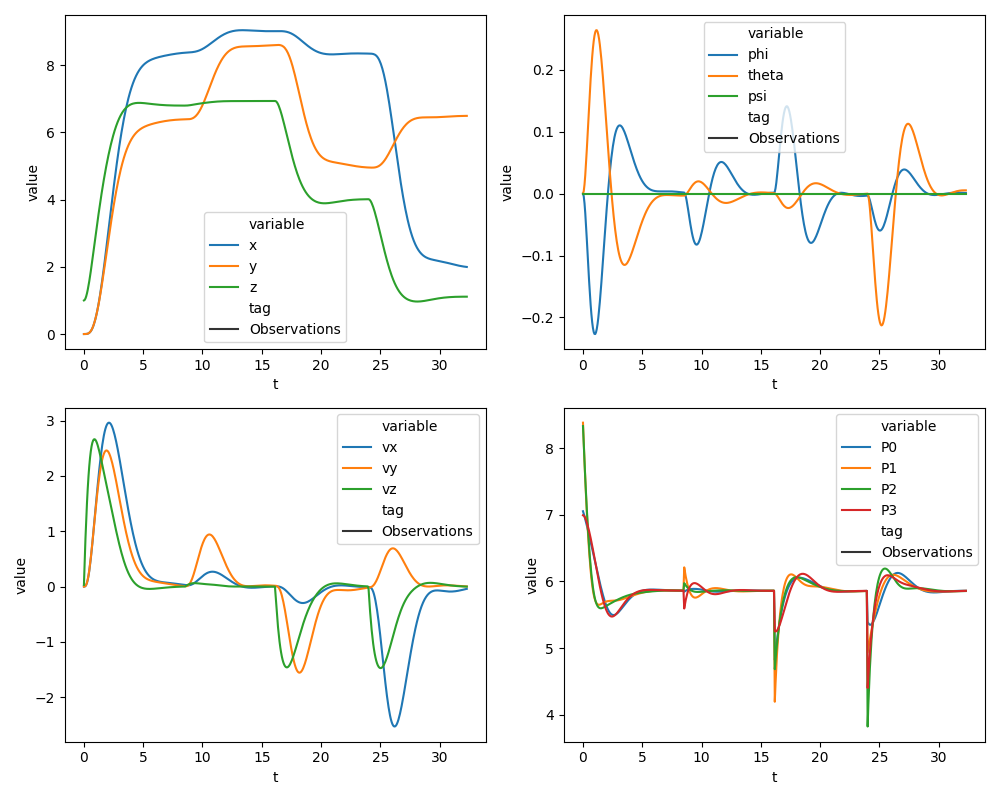

In [6]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df.query("variable in ('x','y','z')"), x='t',y='value',hue='variable', style='tag',ax=ax[0])
ax[0].legend()

sns.lineplot(data=df.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable', style='tag',ax=ax[1])
ax[1].legend()

sns.lineplot(data=df.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable', style='tag',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable', style='tag',ax=ax[3])
ax[3].legend()

fig.tight_layout()